In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
articles = pd.read_csv("../../build/articles2.csv", index_col=0)
articles.drop(columns=["GS_link", "more_info", ], inplace=True)
articles.dropna(inplace=True)

In [10]:
import ast
articles.llama_subjects = articles.llama_subjects.apply(ast.literal_eval)

In [11]:
candidate_labels = [
    "Agricultural and Biological Sciences", "Arts and Humanities", "Biochemistry, Genetics and Molecular Biology",
    "Business, Management and Accounting", "Chemical Engineering", "Chemistry", "Computer Science",
    "Decision Sciences", "Dentistry", "Earth and Planetary Sciences", "Economics, Econometrics and Finance",
    "Energy", "Environmental Science", "Immunology and Microbiology",
    "Materials Science", "Mathematics", "Medicine", "Neuroscience", "Nursing",
    "Pharmacology, Toxicology and Pharmaceutics", "Physics and Astronomy", "Psychology", "Social Sciences",
    "Veterinary", "Biological and Agricultural Sciences"
]


def assign_closest(x):
    x_copy = x.copy()
    for i in x:
        if i not in candidate_labels:
            x_copy.remove(i)
    if x_copy:
        if x_copy[0] == "Biological and Agricultural Sciences":
            return "Agricultural and Biological Sciences"
        return x_copy[0]

articles["main_subject"] = articles.llama_subjects.apply(assign_closest)
articles.drop(columns=["llama_subjects"], inplace=True)

In [12]:
articles.dropna(inplace=True)

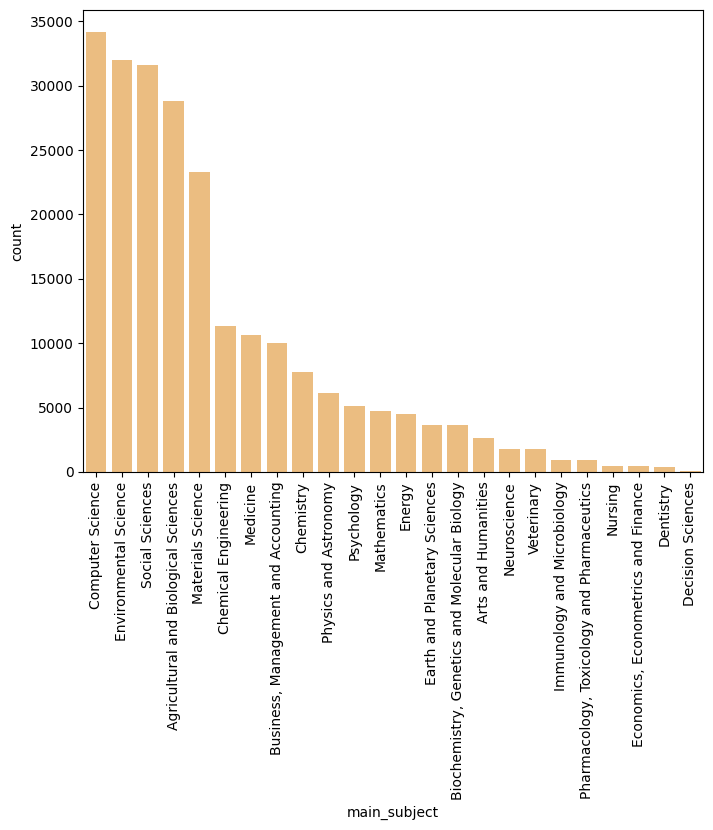

In [13]:
sorted_order = articles['main_subject'].value_counts().index


plt.figure(figsize=(8, 6))
sns.countplot(articles, x="main_subject", order=sorted_order,  color=sns.color_palette("Paired")[6])
plt.xticks(rotation=90);

In [14]:
articles

,title,year,cite,main_authors,link_ids_x,main_subject
0,Timing of surgery following SARS‐CoV‐2 infecti...,2021,382,"COVIDSurg Collaborative, GlobalSurg Collaborat...","55,0,116",Medicine
1,Timing of surgery following SARS‐CoV‐2 infecti...,2021,382,"COVIDSurg Collaborative, GlobalSurg Collaborat...","55,0,116",Medicine
2,SARS-CoV-2 infection and venous thromboembolis...,2022,48,"C COVIDSurg, C GlobalSurg","0,116",Medicine
3,Effects of pre‐operative isolation on postoper...,2021,24,"COVIDSurg Collaborative, GlobalSurg Collaborat...","55,0,116",Medicine
4,Measurements of the ...,2021,2,"V Khachatryan, AM Sirunyan, A Tumasyan, W Adam...","34234,0,5600",Environmental Science
...,...,...,...,...,...,...
252874,Pattern of analysis of social networks with bi...,2020,0,"IM F Akbari, H Mirzagoltabar",49376,Social Sciences
252875,Fuzzy Scheduling Problem on Unrelated Parallel...,2020,3,"J Rezaeian, S Mohammad-Hosseini, S Zabihzadeh,...",49378,Computer Science
252876,Clustering students’ writing behaviors using k...,2022,6,"M Talebinamvar, F Zarrabi",49384,Computer Science
252877,A Survey of A li ations of Arti ial Intelligen...,2021,0,"JH Joloudari, S Mojrian, I Nodehi, A Mashmool,...",49386,Computer Science
